# Below we will import various libraries that are needed for data preprocessing.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Dataset : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# Let us see how the librosa library loads the audio file and see the sample rate.

In [4]:
y, sr = librosa.load('/content/drive/MyDrive/data/wavfiles/blues.00005.wav')

In [5]:
y.shape

(661794,)

# Sampling rate

In [6]:
sr

22050

## Ref: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

# Plotting the wave(signal) using matplot

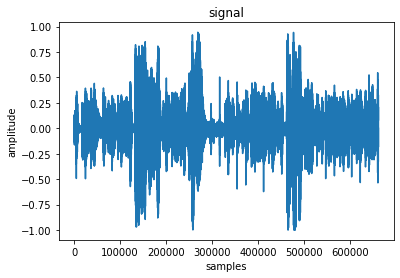

In [7]:
# Plotting the wave
plt.plot(y);
plt.title('signal');
plt.xlabel('samples');
plt.ylabel('amplitude');

# Fourier Transform

In [8]:
fourier_transform = np.abs(librosa.stft(y[:2048], hop_length = 2048+1))

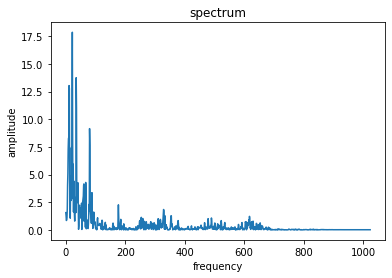

In [9]:
plt.plot(fourier_transform);
plt.title('spectrum');
plt.xlabel('frequency');
plt.ylabel('amplitude');

# Plotting the spectrogram

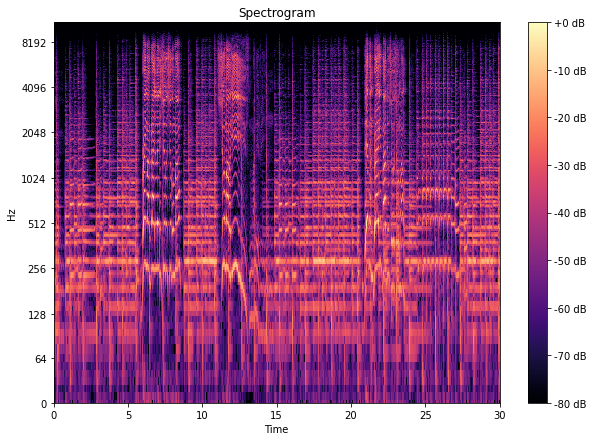

In [10]:
spectrogram = np.abs(librosa.stft(y, hop_length=512))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7));
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

# Melspectrogram

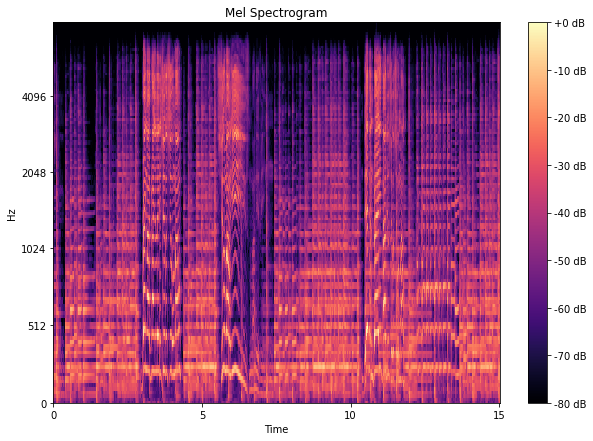

In [11]:
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7))
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

# MFFC 

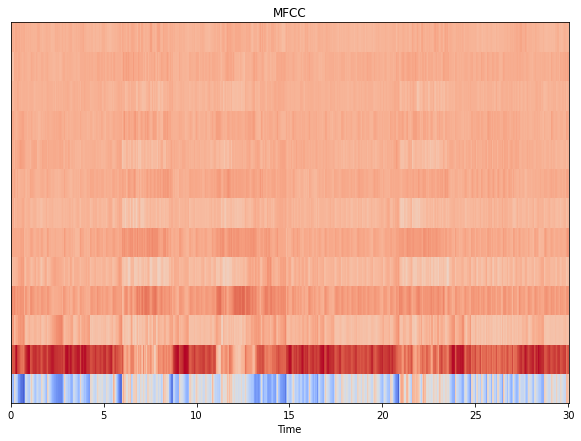

In [12]:
mfccData = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
plt.figure(figsize=(10,7));
librosa.display.specshow(mfccData, x_axis='time');
plt.title('MFCC');

# Below we will extract the sepctrogram data from the audio files in the parent folder. And save them into a dataframe and X and y.

In [13]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    m = []
    gl = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        gl.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
        s = spectrograms.flatten()
        m.append(s)
        
    m = np.array(m)
    gl = np.array(gl).reshape(1000,1)
    data = np.hstack((m,gl))
    data = pd.DataFrame(data)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y,data

In [14]:
X, y, data = melspectrogram('/content/drive/MyDrive/data/wavfiles/')

In [15]:
data.to_csv('spectrogramdata.csv', index=False)

# Data Cleaning

## Lets read the data and do the necessary changes

In [17]:
print(data)

          0           1           2           3      ... 84477 84478 84479  84480
0    -45.674923  -52.609703  -57.399586  -54.405563  ...   0.0   0.0   0.0  blues
1    -29.381193  -17.828934  -16.082321   -21.42917  ...   0.0   0.0   0.0  blues
2     -45.88095  -54.637447   -52.34913  -47.835194  ...   0.0   0.0   0.0  blues
3    -22.884243  -38.427704  -44.643795   -43.34305  ...   0.0   0.0   0.0  blues
4    -29.582403  -40.890636   -53.68829  -58.673912  ...   0.0   0.0   0.0  blues
..          ...         ...         ...         ...  ...   ...   ...   ...    ...
995   -21.43819   -47.69164  -46.345024  -49.496147  ...   0.0   0.0   0.0   rock
996   -16.60213  -50.729176  -47.573784   -49.77964  ...   0.0   0.0   0.0   rock
997    -56.1877  -54.681362  -51.183456  -27.941032  ...   0.0   0.0   0.0   rock
998  -35.490837   -42.72757    -44.5094   -43.39858  ...   0.0   0.0   0.0   rock
999  -41.149796  -35.082447   -36.68667  -40.327217  ...   0.0   0.0   0.0   jazz

[1000 rows x 84

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84441,84442,84443,84444,84445,84446,84447,84448,84449,84450,84451,84452,84453,84454,84455,84456,84457,84458,84459,84460,84461,84462,84463,84464,84465,84466,84467,84468,84469,84470,84471,84472,84473,84474,84475,84476,84477,84478,84479,84480
0,-45.674923,-52.609703,-57.399586,-54.405563,-53.770485,-34.82696,-31.622435,-36.683598,-44.0002,-44.38944,-49.23916,-52.13568,-51.809654,-52.10451,-56.54388,-52.509216,-60.341164,-55.151028,-49.106567,-49.455635,-58.4432,-50.386784,-54.598816,-53.035927,-36.981834,-27.787079,-35.285122,-43.720963,-45.721153,-52.107353,-49.745586,-49.901546,-50.81616,-51.72677,-63.06997,-58.7214,-46.25878,-49.94233,-50.20826,-53.305573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
1,-29.381193,-17.828934,-16.082321,-21.42917,-23.70478,-29.580908,-28.251745,-31.71809,-36.745407,-38.221283,-41.73785,-43.955067,-36.975353,-20.525597,-14.919221,-16.554745,-22.336693,-20.584965,-20.592157,-21.792213,-25.13155,-12.180038,-23.016186,-20.796227,-30.270826,-26.505362,-36.738995,-32.183937,-37.420662,-37.494846,-40.593792,-37.265068,-26.846375,-20.042677,-25.594904,-26.44183,-17.955648,-14.827248,-19.345654,-19.746159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
2,-45.88095,-54.637447,-52.34913,-47.835194,-44.991604,-52.88778,-52.86802,-50.610516,-58.036926,-58.738487,-56.10672,-58.695427,-57.07007,-50.962387,-49.968163,-59.012794,-51.073975,-44.63424,-39.20639,-42.28189,-47.59491,-46.69585,-45.28365,-50.44397,-49.914608,-62.31877,-58.665253,-58.653168,-56.987877,-48.335007,-50.961517,-46.786682,-40.95395,-41.652683,-44.394947,-40.9202,-42.874134,-48.45378,-50.720627,-51.760685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
3,-22.884243,-38.427704,-44.643795,-43.34305,-49.78785,-49.41929,-45.321747,-45.88495,-48.977386,-47.32661,-46.515022,-52.74157,-51.650406,-51.359726,-42.04261,-44.222225,-47.61,-53.495735,-53.170555,-49.835796,-56.225395,-56.497612,-53.799065,-60.73149,-53.530594,-54.583534,-55.213127,-40.04186,-39.233162,-42.64796,-42.7774,-42.645737,-40.984337,-37.71827,-38.52995,-38.173298,-49.670975,-49.85627,-53.317207,-54.997627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
4,-29.582403,-40.890636,-53.68829,-58.673912,-56.27255,-57.726845,-42.94895,-41.516228,-43.82246,-51.094685,-54.818794,-61.44406,-64.52724,-55.785324,-56.355103,-60.959614,-64.754654,-47.22877,-45.024345,-53.807022,-55.99699,-65.05283,-60.920563,-60.778618,-56.241837,-47.446938,-45.018524,-45.01165,-45.146156,-49.535454,-47.449493,-58.321804,-67.56735,-64.54619,-54.057976,-46.753654,-44.53231,-47.973347,-50.307953,-47.196083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues


In [19]:
data.iloc[:,-1:]

,84480
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
995,rock
996,rock
997,rock
998,rock


### Lets rename the above column and map them to the values 

In [20]:
genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}

In [21]:
data.columns = data.columns.astype(str)
data = data.rename(columns={"84480": "labels"})

In [22]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '84471', '84472', '84473', '84474', '84475', '84476', '84477', '84478',
       '84479', 'labels'],
      dtype='object', length=84481)

In [23]:
data['y'] = data['labels'].map(genreLabels)

In [26]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84442,84443,84444,84445,84446,84447,84448,84449,84450,84451,84452,84453,84454,84455,84456,84457,84458,84459,84460,84461,84462,84463,84464,84465,84466,84467,84468,84469,84470,84471,84472,84473,84474,84475,84476,84477,84478,84479,labels,y
0,-45.674923,-52.609703,-57.399586,-54.405563,-53.770485,-34.82696,-31.622435,-36.683598,-44.0002,-44.38944,-49.23916,-52.13568,-51.809654,-52.10451,-56.54388,-52.509216,-60.341164,-55.151028,-49.106567,-49.455635,-58.4432,-50.386784,-54.598816,-53.035927,-36.981834,-27.787079,-35.285122,-43.720963,-45.721153,-52.107353,-49.745586,-49.901546,-50.81616,-51.72677,-63.06997,-58.7214,-46.25878,-49.94233,-50.20826,-53.305573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues,1
1,-29.381193,-17.828934,-16.082321,-21.42917,-23.70478,-29.580908,-28.251745,-31.71809,-36.745407,-38.221283,-41.73785,-43.955067,-36.975353,-20.525597,-14.919221,-16.554745,-22.336693,-20.584965,-20.592157,-21.792213,-25.13155,-12.180038,-23.016186,-20.796227,-30.270826,-26.505362,-36.738995,-32.183937,-37.420662,-37.494846,-40.593792,-37.265068,-26.846375,-20.042677,-25.594904,-26.44183,-17.955648,-14.827248,-19.345654,-19.746159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues,1
2,-45.88095,-54.637447,-52.34913,-47.835194,-44.991604,-52.88778,-52.86802,-50.610516,-58.036926,-58.738487,-56.10672,-58.695427,-57.07007,-50.962387,-49.968163,-59.012794,-51.073975,-44.63424,-39.20639,-42.28189,-47.59491,-46.69585,-45.28365,-50.44397,-49.914608,-62.31877,-58.665253,-58.653168,-56.987877,-48.335007,-50.961517,-46.786682,-40.95395,-41.652683,-44.394947,-40.9202,-42.874134,-48.45378,-50.720627,-51.760685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues,1
3,-22.884243,-38.427704,-44.643795,-43.34305,-49.78785,-49.41929,-45.321747,-45.88495,-48.977386,-47.32661,-46.515022,-52.74157,-51.650406,-51.359726,-42.04261,-44.222225,-47.61,-53.495735,-53.170555,-49.835796,-56.225395,-56.497612,-53.799065,-60.73149,-53.530594,-54.583534,-55.213127,-40.04186,-39.233162,-42.64796,-42.7774,-42.645737,-40.984337,-37.71827,-38.52995,-38.173298,-49.670975,-49.85627,-53.317207,-54.997627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues,1
4,-29.582403,-40.890636,-53.68829,-58.673912,-56.27255,-57.726845,-42.94895,-41.516228,-43.82246,-51.094685,-54.818794,-61.44406,-64.52724,-55.785324,-56.355103,-60.959614,-64.754654,-47.22877,-45.024345,-53.807022,-55.99699,-65.05283,-60.920563,-60.778618,-56.241837,-47.446938,-45.018524,-45.01165,-45.146156,-49.535454,-47.449493,-58.321804,-67.56735,-64.54619,-54.057976,-46.753654,-44.53231,-47.973347,-50.307953,-47.196083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-21.43819,-47.69164,-46.345024,-49.496147,-39.20977,-42.822433,-52.43432,-48.82676,-55.49386,-49.966072,-40.367165,-37.412136,-42.95397,-42.96167,-50.641277,-56.170403,-47.503628,-38.955193,-42.483147,-50.922302,-52.812992,-54.73403,-58.178513,-29.527857,-35.705025,-31.596786,-32.36028,-31.407726,-29.565374,-28.130455,-27.898243,-28.485075,-27.111307,-29.049

# EDA

In [27]:
genres = list(data['labels'].unique())

In [28]:
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [32]:
def plotMelSpectrogram(genre):
    y, sr = librosa.core.load(f'/content/drive/MyDrive/data/wavfiles/{genre}.00000.wav')
    s = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    s = librosa.power_to_db(s, ref=np.max)
    plt.figure(figsize=(12,8))
    librosa.display.specshow(s, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

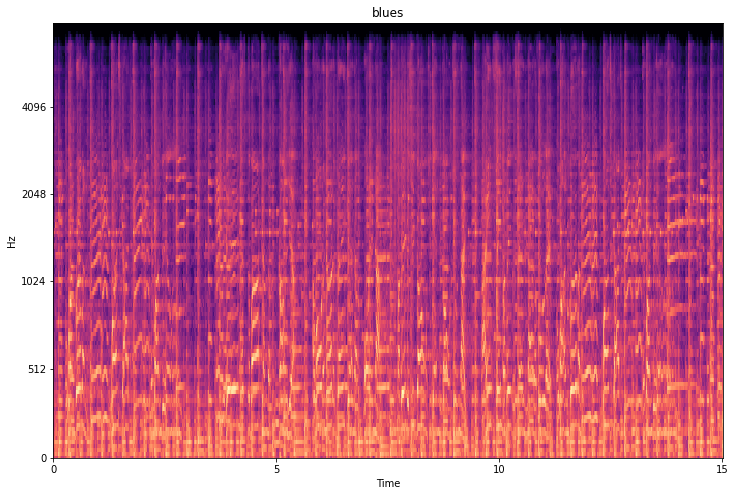

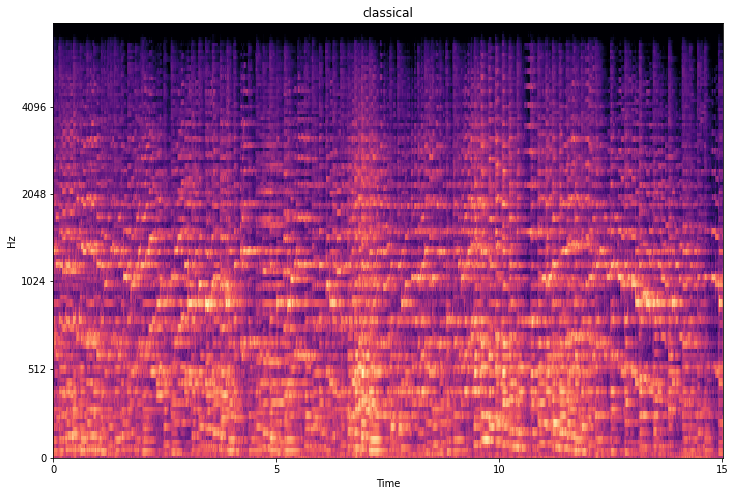

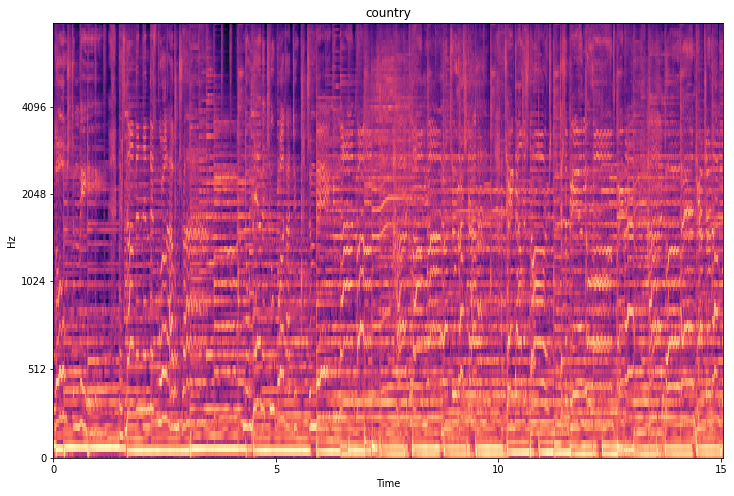

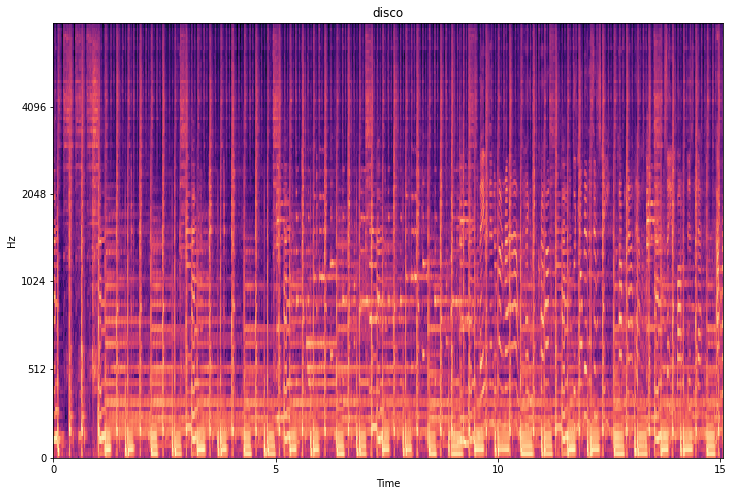

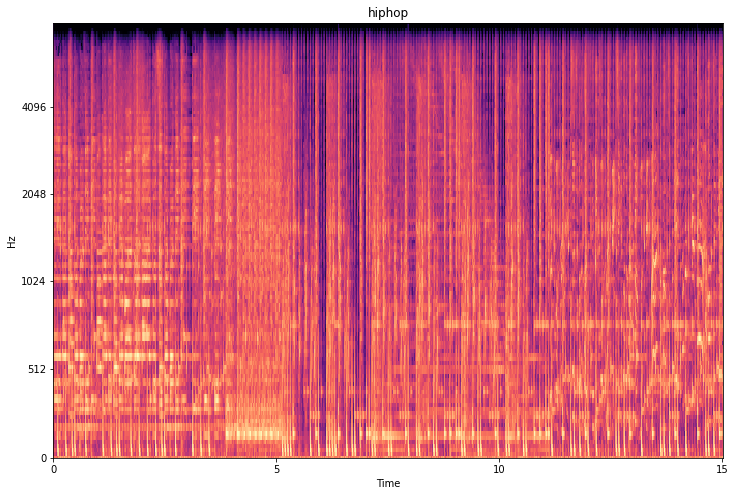

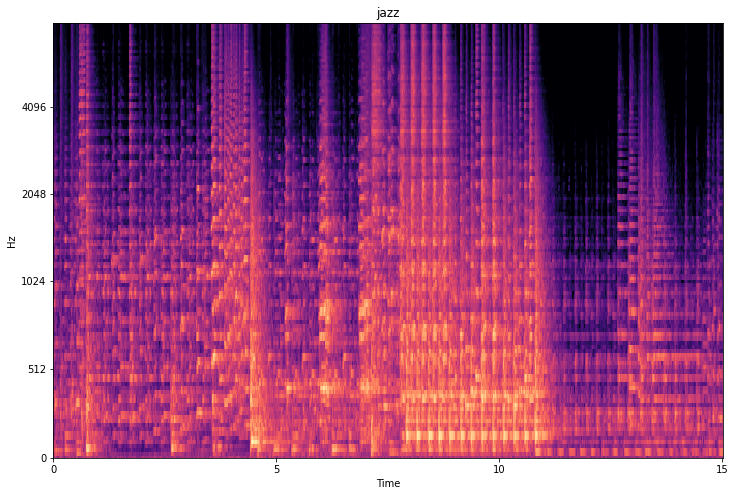

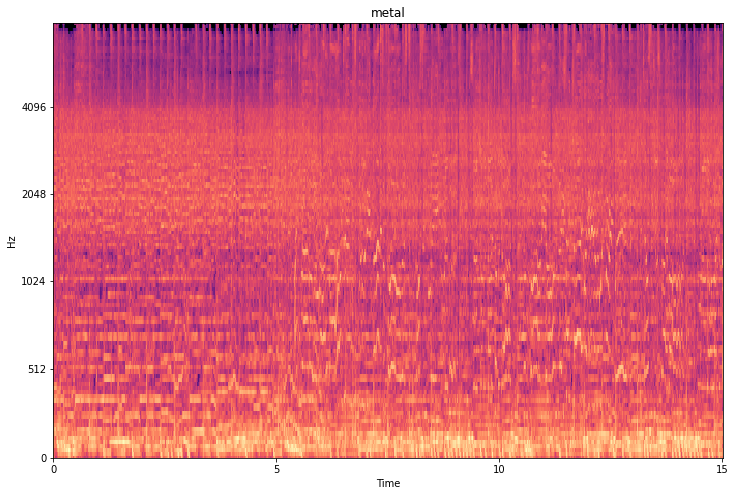

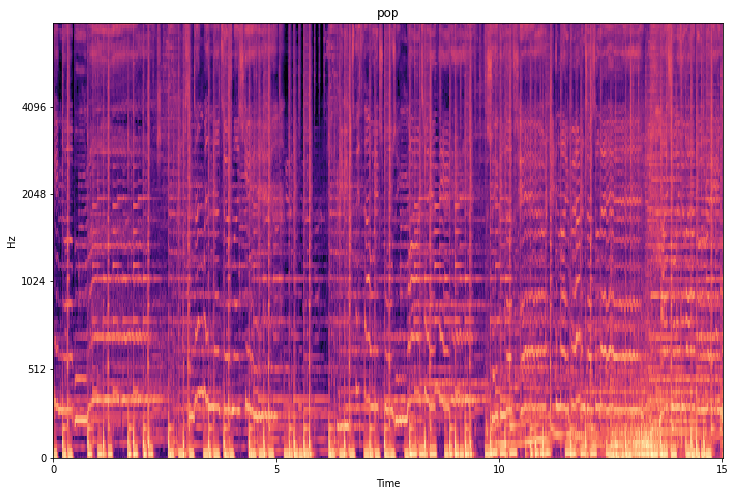

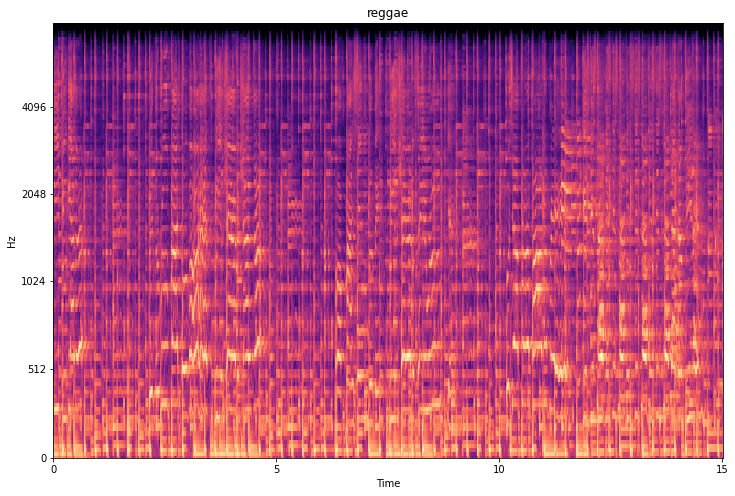

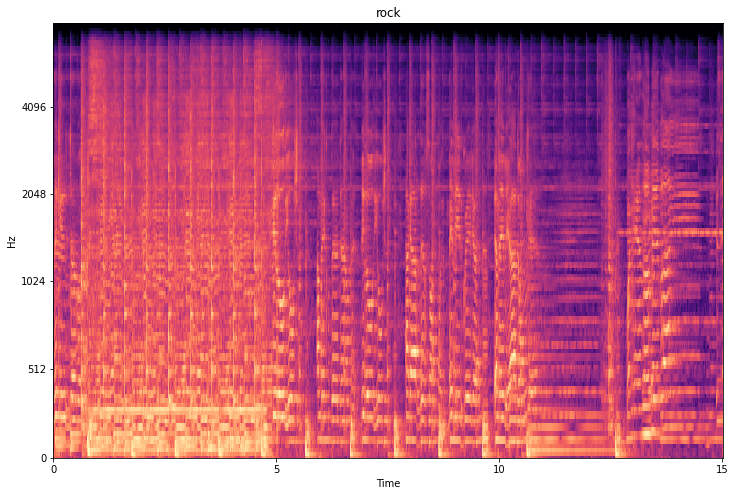

In [33]:
for g in genres:
    plotMelSpectrogram(g)